# c4

In [1]:
import sys
sys.path.append("/users/PAS0654/osu8354/root6_14_build/lib") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python2.7/site-packages")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
#%jsroot on

Welcome to JupyROOT 6.14/06


## Calpulser 5 

### Import files and names

In [2]:
f0 = ROOT.TFile("/users/PCON0003/cond0068/ARA/AraRoot/analysis/calpul_box/A2_c4_2143025Events_DistroCalPulses_Pol0_CP5_forFit.root")
vpol_5=f0.Get("Colz_Vpol")
nam

NameError: name 'nam' is not defined

### Let's get the plots first


Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


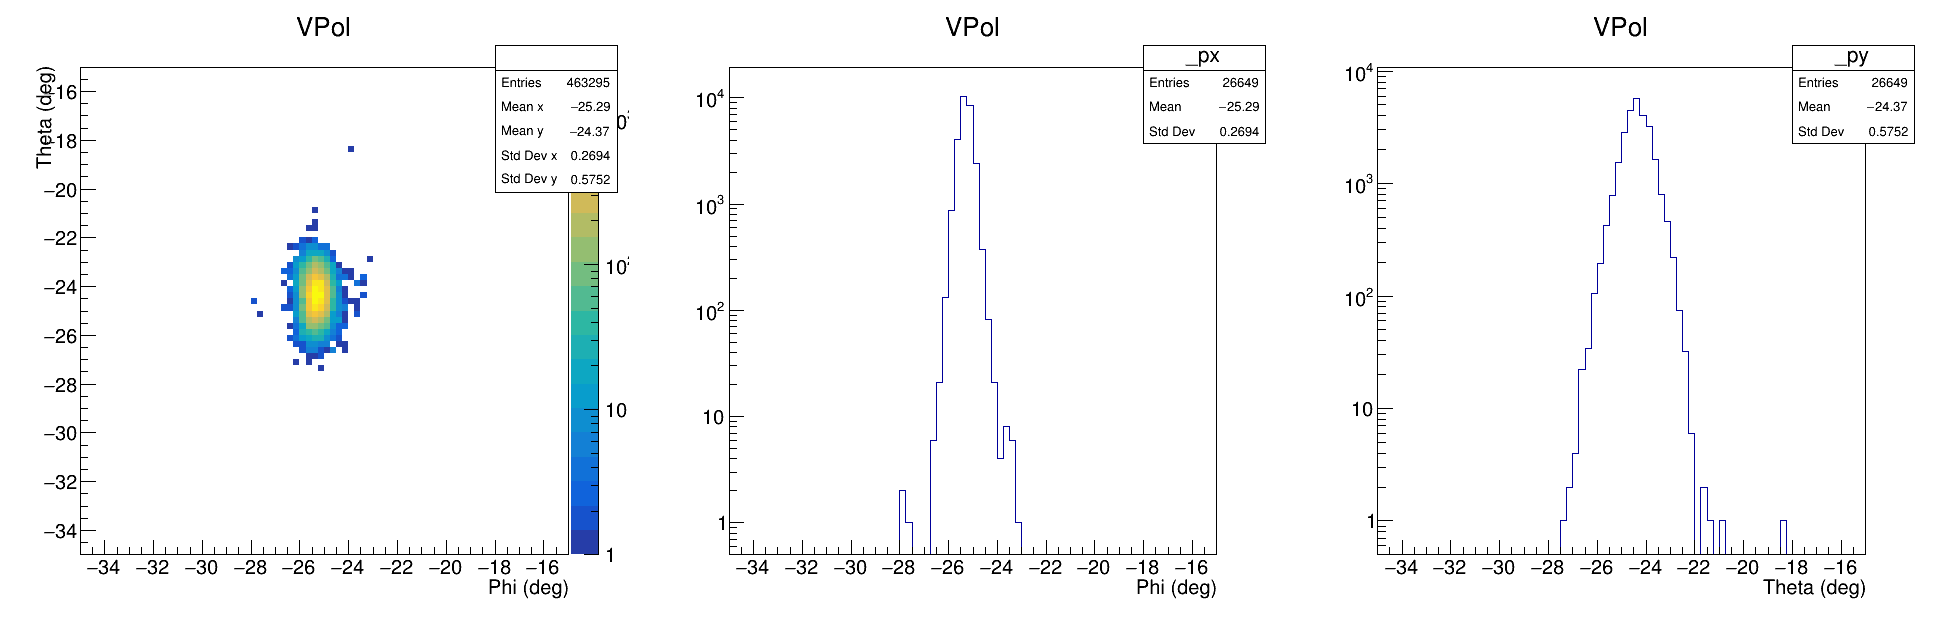

In [7]:
c=ROOT.TCanvas("","",650*3,650)
c.Divide(3,1)
c.cd(1)
vpol_5.Draw("COLZ")
gPad.SetLogz()
c.cd(2)
phi_proj_gaus_5=vpol_5.ProjectionX()
phi_proj_gaus_5.Draw()
gPad.SetLogy()
c.cd(3)
theta_proj_gaus_5=vpol_5.ProjectionY()
theta_proj_gaus_5.Draw()
gPad.SetLogy()
c.Draw()

### Fitting attempt

In [43]:
phi_proj_5=vpol_5.ProjectionX()
theta_proj_5=vpol_5.ProjectionY()


j1 = ROOT.TF1("n1","gaus",-28,-20)
j2 = ROOT.TF1("n2","gaus",-26,-20)
#j3 = ROOT.TF1("n2","gaus",5,8)

#phi.Fit("gaus","S")
total_th = ROOT.TF1("nstotal","gaus(0)+gaus(3)",-28,-20)
total_th.SetLineColor(4)
theta_proj_5.Fit(j1,"0R");
theta_proj_5.Fit(j2,"0RQ+");
#theta_proj.Fit(j3,"0RQ+");
mean_th=np.zeros(6)
for i in range(0,3):
    mean_th[i]=j1.GetParameter(i)
for i in range(3,6):
    mean_th[i]=j2.GetParameter(i-3)
# for i in range(6,9):
#     mean_th[i]=j3.GetParameter(i-6)
total_th.SetParameters(mean_th);
allfit_theta=theta_proj_5.Fit(total_th,"ESRQ+")

g1 = ROOT.TF1("m1","gaus",-28,-24)
g2 = ROOT.TF1("m2","gaus",-24,-20)
g3 = ROOT.TF1("m2","pol2",-24,-18)

#The total is the sum of the three, each has 3 parameters
total = ROOT.TF1("mstotal","gaus(0)+gaus(3)+pol2(6)",-28,-18)
total.SetLineColor(4)
phi_proj_5.Fit(g1,"0R");
phi_proj_5.Fit(g2,"0RQ+");
phi_proj_5.Fit(g3,"0RQ+");

mean=np.zeros(9)
for i in range(0,3):
    mean[i]=g1.GetParameter(i)
for i in range(3,6):
    mean[i]=g2.GetParameter(i-3)
for i in range(6,9):
    mean[i]=g3.GetParameter(i-6)
total.SetParameters(mean);
allfit=phi_proj_5.Fit(total,"ERQS+")


 FCN=618.961 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=8.08618e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.74462e+03   4.03811e+01   3.57547e-01   2.58524e-06
   2  Mean        -2.43659e+01   3.39165e-03   4.12342e-05   1.16310e-01
   3  Sigma        5.47154e-01   3.19097e-03   1.67614e-05   4.62879e-02
 FCN=248.798 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=4.41385e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.03622e+04   8.34633e+01   4.92319e-01   2.79719e-06
   2  Mean        -2.52958e+01   1.56526e-03   1.20645e-05  -1.07878e-01
   3  Sigma        2.53919e-01   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


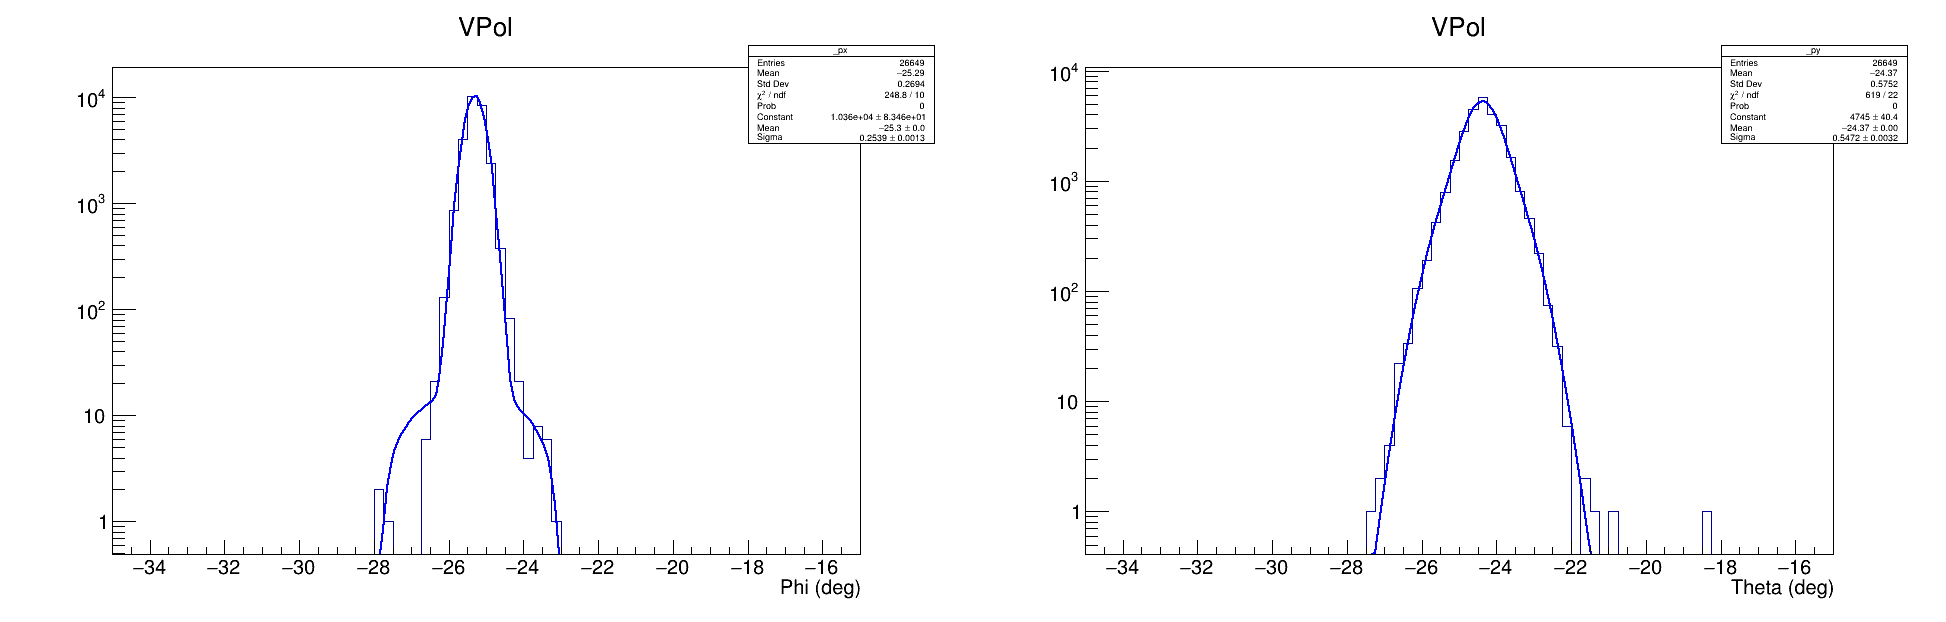

In [44]:
c=ROOT.TCanvas("","",650*3,650)
# phi_int=total.Integral(-27,-21)
# th_int=total_th.Integral(-30,-18)
# name_ph="Phi Projection Near peak, Integral="+ str(phi_int)
# name_th="Theta Projection Near peak, Integral="+ str(th_int)
c.Divide(2,1)

c.cd(1)
phi_proj_5.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)

c.cd(2)
theta_proj_5.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)
c.Draw()

## Calpulser 6

### Import files and names

In [45]:
f1 = ROOT.TFile("/users/PCON0003/cond0068/ARA/AraRoot/analysis/calpul_box/A2_c4_2143025Events_DistroCalPulses_Pol0_CP6_forFit.root"
vpol=f1.Get("Colz_Vpol")

### Let's get the plots first

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


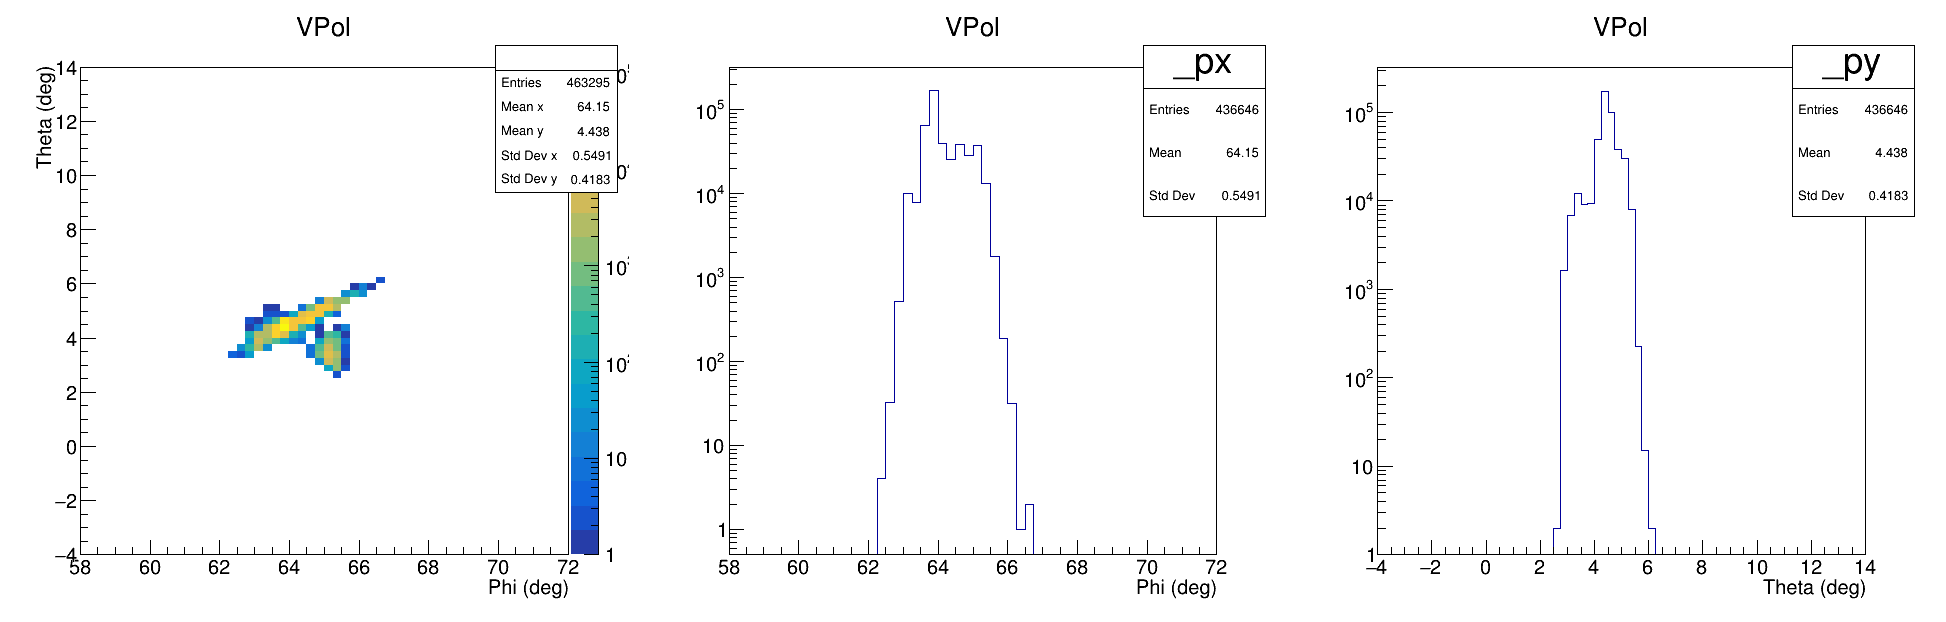

In [46]:
c=ROOT.TCanvas("","",650*3,650)
c.Divide(3,1)
c.cd(1)
vpol.Draw("COLZ")
gPad.SetLogz()
c.cd(2)
phi_proj_gaus=vpol.ProjectionX()
phi_proj_gaus.Draw()
gPad.SetLogy()
c.cd(3)
theta_proj_gaus=vpol.ProjectionY()
theta_proj_gaus.Draw()
gPad.SetLogy()
c.Draw()

### Fit the distros

In [53]:
phi_proj=vpol.ProjectionX()
theta_proj=vpol.ProjectionY()


j1 = ROOT.TF1("n1","gaus",2,4)
j2 = ROOT.TF1("n2","gaus",4,6)
j3 = ROOT.TF1("n2","gaus",5,8)

#phi.Fit("gaus","S")
total_th = ROOT.TF1("nstotal","gaus(0)+gaus(3)+gaus(6)",0,9)
total_th.SetLineColor(4)
theta_proj.Fit(j1,"0R");
theta_proj.Fit(j2,"0RQ+");
theta_proj.Fit(j3,"0RQ+");
mean_th=np.zeros(9)
for i in range(0,3):
    mean_th[i]=j1.GetParameter(i)
for i in range(3,6):
    mean_th[i]=j2.GetParameter(i-3)
for i in range(6,9):
    mean_th[i]=j3.GetParameter(i-6)
total_th.SetParameters(mean_th);
allfit_theta=theta_proj.Fit(total_th,"ESRQ+")

g1 = ROOT.TF1("m1","gaus",62,64)
g2 = ROOT.TF1("m2","gaus",64,72)
g3 = ROOT.TF1("m2","gaus",62,68)

#The total is the sum of the three, each has 3 parameters
total = ROOT.TF1("mstotal","gaus(0)+gaus(3)+gaus(6)",60,76)
total.SetLineColor(4)
phi_proj.Fit(g1,"0R");
phi_proj.Fit(g2,"0RQ+");
phi_proj.Fit(g3,"0RQ+");

mean=np.zeros(9)
for i in range(0,3):
    mean[i]=g1.GetParameter(i)
for i in range(3,6):
    mean[i]=g2.GetParameter(i-3)
for i in range(6,9):
    mean[i]=g3.GetParameter(i-6)
total.SetParameters(mean);
allfit=phi_proj.Fit(total,"ERQS+")


 FCN=5121.27 FROM MIGRAD    STATUS=CONVERGED      90 CALLS          91 TOTAL
                     EDM=1.80347e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.31833e+04   7.86328e+01   2.48906e+00   5.52788e-06
   2  Mean         3.53810e+00   2.80141e-03   5.55947e-05   2.29836e-01
   3  Sigma        2.69273e-01   1.03610e-03   2.33060e-05  -4.47419e-01
 FCN=9926.87 FROM MIGRAD    STATUS=CONVERGED     134 CALLS         135 TOTAL
                     EDM=3.43621e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.93946e+05   1.87033e+03   1.91313e+01  -2.29847e-07
   2  Mean         6.40073e+01   5.34636e-03   3.05211e-05   9.96967e-02
   3  Sigma        2.55122e-01   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: 


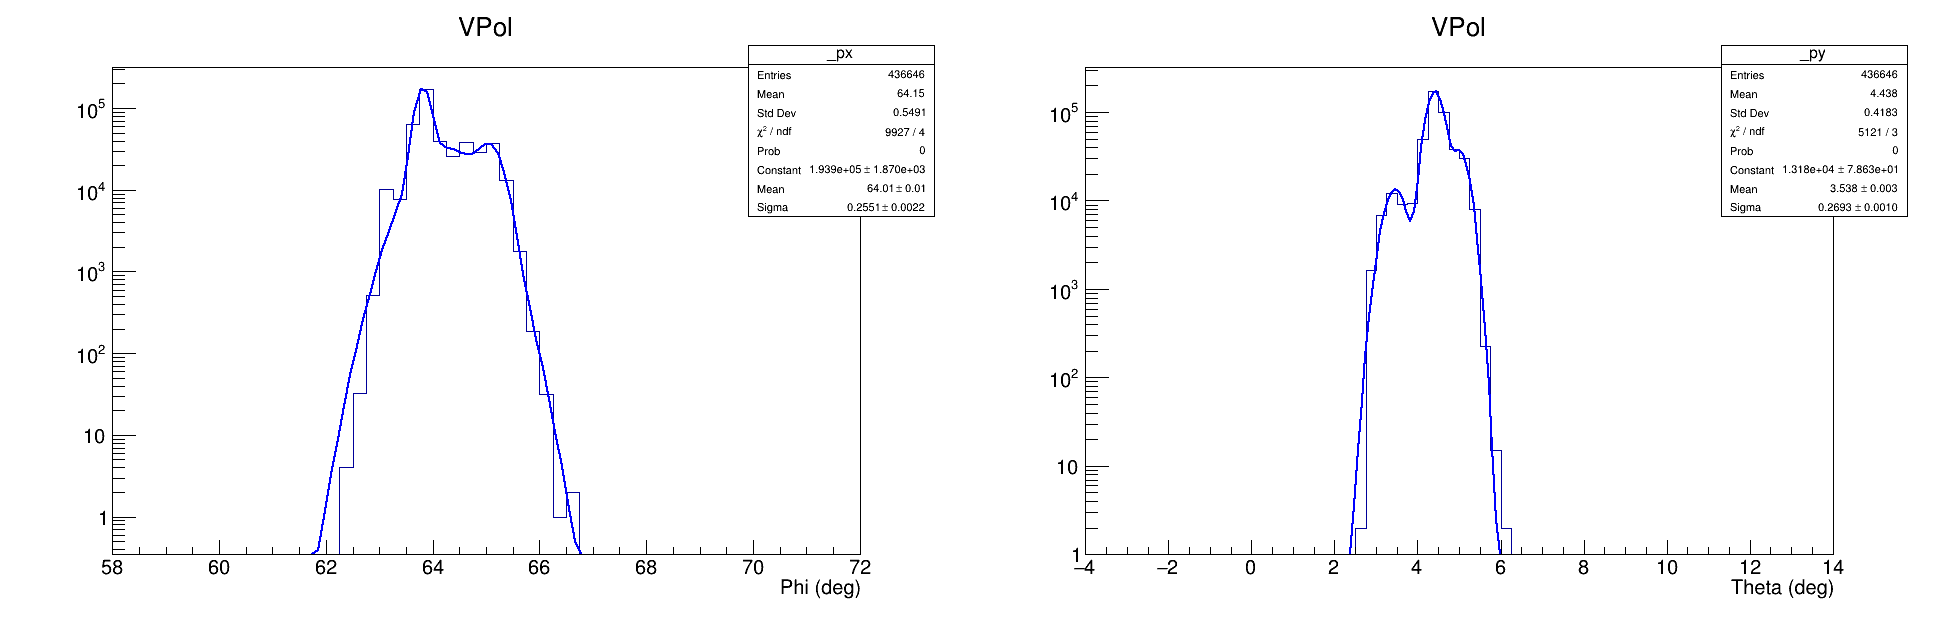

In [54]:
c=ROOT.TCanvas("","",650*3,650)
phi_int=total.Integral(-27,-21)
th_int=total_th.Integral(-30,-18)
name_ph="Phi Projection Near peak, Integral="+ str(phi_int)
name_th="Theta Projection Near peak, Integral="+ str(th_int)
c.Divide(2,1)

c.cd(1)
phi_proj.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)

c.cd(2)
theta_proj.Draw()
gPad.SetLogy()
gStyle.SetOptFit(1111)
c.Draw()